<a href="https://colab.research.google.com/github/shineeyang/Machine-Learning/blob/master/04_03_2019_AFW_cancellation_classification_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Ingest

## 1.1 Import Packages

In [0]:
!pip install --upgrade cufflinks

    100% |████████████████████████████████| 81kB 5.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/7f/d3/7d3146a1551614bf0b8eb631ac724d044dd341679e763b594b
Successfully built cufflinks
  Found existing installation: cufflinks 0.14.6
    Uninstalling cufflinks-0.14.6:
      Successfully uninstalled cufflinks-0.14.6


In [0]:
#import

#pandas
import pandas as pd

#numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import time
import random
import sklearn


#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from yellowbrick.features import RFECV
import statsmodels.formula.api as smf

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print (__version__) # requires version >= 1.9.0

3.6.1


In [0]:
!pip install --upgrade plotly
import plotly
plotly.tools.set_credentials_file(username='ineshe', api_key='PcyuzYithW72BHtQXlB7')


import plotly.plotly as py
import plotly.graph_objs as go


    100% |████████████████████████████████| 35.7MB 853kB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


##  1.2 Import Data

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

 12550813150009656190.docx	   'Customer Assessment Report '
 12550813150009656190.gdoc	    goal.gdoc
'452-Machine Learning- homework '   Hotel_Reviews.csv
 AAC_Kickoff_2018_Final.pdf	    IMG_5034.TRIM.MOV
 AAC_StudentTemplate.gslides	   'OAR 2.0.gdoc'
 all-exchanges-strings.lc.txt	    sow.2.0.docx
 aws-credentials.txt		    sow.2.0.gdoc
 cancellation_ML.csv		   'Untitled Diagram.html'
'Colab Notebooks'		   'Untitled document.gdoc'


In [0]:
df = pd.read_csv("/content/drive/My Drive/cancellation_ML.csv")

## 1.3 Data Cleaning

1 cancelled, 0 not cancelled

In [0]:
df.head()

,passenger_id,mission_leg_id,cancelled,leg_count,year,mission_date,weekday_of_mission,month,lead_time,season,...,t_long,route_id,type,cancel_comment,companion_count,passenger_weight,companion_weight,baggage_weight,total_weight,repeated_passenger
0,17006,111688,1,2,2016,2016/1/6 0:00,4,1,89.0,1,...,-118.451302,33494494,NaN,NaN,0,100,NaN,25,125,1
1,17006,111690,1,2,2016,2016/1/6 0:00,4,1,89.0,1,...,-115.134499,44943349,NaN,NaN,0,100,NaN,25,125,1
2,17932,111866,0,2,2016,2016/3/15 0:00,3,3,152.0,1,...,-118.451302,41664494,No Pilot,SK 3/14,1,215,200.0,50,465,1
3,17932,111867,1,2,2016,2016/3/19 0:00,7,3,156.0,1,...,-120.753303,44944166,NaN,NaN,1,215,200.0,50,465,1
4,15132,111928,1,2,2016,2016/1/11 0:00,2,1,84.0,1,...,-110.737701,20693211,NaN,NaN,0,120,NaN,25,145,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
passenger_id          11214 non-null int64
mission_leg_id        11214 non-null int64
cancelled             11214 non-null int64
leg_count             11214 non-null int64
year                  11214 non-null int64
mission_date          11214 non-null object
weekday_of_mission    11214 non-null int64
month                 11214 non-null int64
lead_time             11210 non-null float64
season                11214 non-null int64
leg_distance          11214 non-null int64
total_distance        11214 non-null int64
from_airport_id       11214 non-null int64
f_lat                 11214 non-null float64
f_long                11214 non-null float64
to_airport_id         11214 non-null int64
t_lat                 11214 non-null float64
t_long                11214 non-null float64
route_id              11214 non-null int64
type                  2389 non-null object
cancel_comment      

In [0]:
print(df.isnull().sum())

passenger_id             0
mission_leg_id           0
cancelled                0
leg_count                0
year                     0
mission_date             0
weekday_of_mission       0
month                    0
lead_time                4
season                   0
leg_distance             0
total_distance           0
from_airport_id          0
f_lat                    0
f_long                   0
to_airport_id            0
t_lat                    0
t_long                   0
route_id                 0
type                  8825
cancel_comment        8848
companion_count          0
passenger_weight         0
companion_weight      5380
baggage_weight           0
total_weight             0
repeated_passenger       0
dtype: int64


## drop passenger id, mission id

In [0]:
col = ['passenger_id','mission_leg_id','mission_date','year','passenger_weight','companion_weight','baggage_weight','cancel_comment','type','from_airport_id','f_lat','f_long','to_airport_id','t_lat','t_long','route_id']
df = df.drop(col, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 11 columns):
cancelled             11214 non-null int64
leg_count             11214 non-null int64
weekday_of_mission    11214 non-null int64
month                 11214 non-null int64
lead_time             11210 non-null float64
season                11214 non-null int64
leg_distance          11214 non-null int64
total_distance        11214 non-null int64
companion_count       11214 non-null int64
total_weight          11214 non-null int64
repeated_passenger    11214 non-null int64
dtypes: float64(1), int64(10)
memory usage: 963.8 KB


In [0]:
cols = ['lead_time']
df.dropna(subset = cols,inplace=True)
df['lead_time'] = df['lead_time'].astype(int)
df = df[df['companion_count']<=4]

In [0]:
df.describe()

,cancelled,leg_count,weekday_of_mission,month,lead_time,season,leg_distance,total_distance,companion_count,total_weight,repeated_passenger
count,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000
mean,0.786849,1.961902,3.934065,6.613133,21.210385,0.469397,173.924697,275.797109,0.617773,264.459582,0.860903
std,0.409552,0.793856,1.706759,3.351837,21.605460,0.499085,84.331098,216.762552,0.669182,102.853704,0.346063
min,0.000000,1.000000,1.000000,1.000000,-286.000000,0.000000,17.000000,21.000000,0.000000,25.000000,0.000000
25%,1.000000,1.000000,3.000000,4.000000,8.000000,0.000000,113.000000,114.000000,0.000000,185.000000,1.000000
50%,1.000000,2.000000,4.000000,7.000000,15.000000,0.000000,182.000000,201.000000,1.000000,233.000000,1.000000
75%,1.000000,2.000000,5.000000,10.000000,27.000000,1.000000,225.000000,371.000000,1.000000,342.000000,1.000000
max,1.000000,4.000000,7.000000,12.000000,356.000000,1.000000,1979.000000,1979.000000,4.000000,713.000000,1.000000


In [0]:
#df_copy = df.copy()

## filter out anomalies in lead time(<5 or >90) (439+127 anomolies)

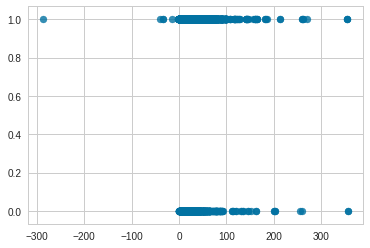

In [0]:
plt.scatter(df['lead_time'],df['cancelled'],  alpha=0.8)

There exist anormalies in distance

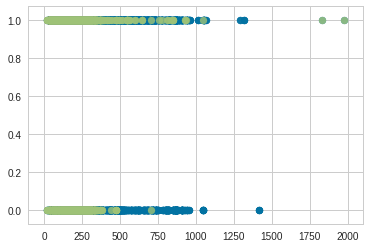

In [0]:
plt.scatter(df['total_distance'],df['cancelled'],  alpha=0.8)
plt.scatter(df['leg_distance'],df['cancelled'],  alpha=0.8)

 exclude outlier whose total distance >1000 and leg_distance >?

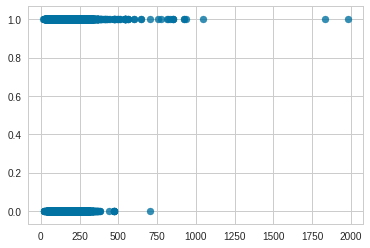

In [0]:
#df = df[df['leg_distance'] < 590]
#df =  df[df['total_distance'] < 1000]
plt.scatter(df['leg_distance'],df['cancelled'],  alpha=0.8)

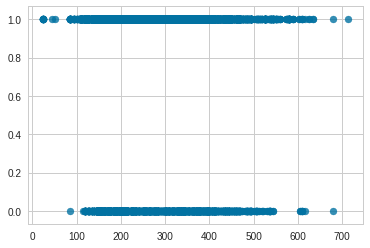

In [0]:
plt.scatter(df['total_weight'],df['cancelled'],  alpha=0.8)

## 1.4 Convert Cagegorical Variables

Convert season to code

In [0]:
df.columns

Index(['cancelled', 'leg_count', 'weekday_of_mission', 'month', 'lead_time',
       'season', 'leg_distance', 'total_distance', 'companion_count',
       'total_weight', 'repeated_passenger'],
      dtype='object')

In [0]:
#df= pd.get_dummies(df,columns=['WeightBin','DistanceBin'])

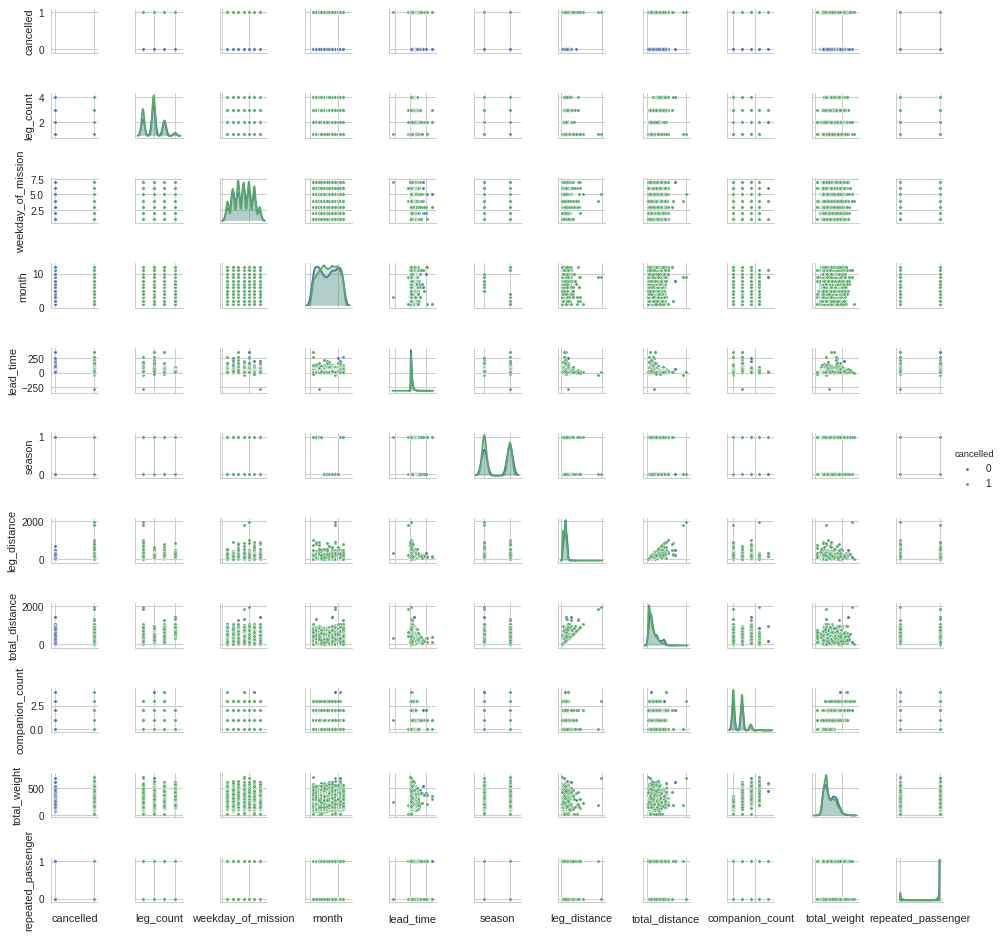

In [0]:
pp = sns.pairplot(df, hue = 'cancelled', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11208 entries, 0 to 11213
Data columns (total 11 columns):
cancelled             11208 non-null int64
leg_count             11208 non-null int64
weekday_of_mission    11208 non-null int64
month                 11208 non-null int64
lead_time             11208 non-null int64
season                11208 non-null int64
leg_distance          11208 non-null int64
total_distance        11208 non-null int64
companion_count       11208 non-null int64
total_weight          11208 non-null int64
repeated_passenger    11208 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


# 2. Exploratory Data Analysis

In [0]:
df.columns

Index(['cancelled', 'leg_count', 'weekday_of_mission', 'month', 'lead_time',
       'season', 'leg_distance', 'total_distance', 'companion_count',
       'total_weight', 'repeated_passenger'],
      dtype='object')

* Mission covered: cancellation because of weather or no pilot

* Target Variable: Whether missions cancel(0) or not(1)


* Numerical field: 
 * lead_time
  * distance
  * weight 
* Categorical field:
  * multiclass:
   * leg_count
   * weekday_of_mission
   * month
   * season
    * passenger number
  * binery:
   * repeated_passenger

  


## Histogram and Stacked Bar Chart

### Mission By Lead Time

In [0]:
lead_time_lower = df['lead_time']>=5
lead_time_upper = df['lead_time']<90
df_leadtime = df[lead_time_lower & lead_time_upper]

#bins_lt = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
bins_lt = (np.arange(5, 90, step=10))
df_leadtime['LeadTimeBin'] = pd.cut(df_leadtime['lead_time'].astype(int), bins_lt,right = False, include_lowest =True)

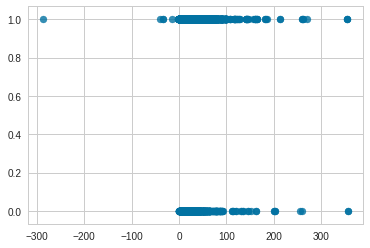

In [0]:
plt.scatter(df['lead_time'],df['cancelled'],  alpha=0.8)

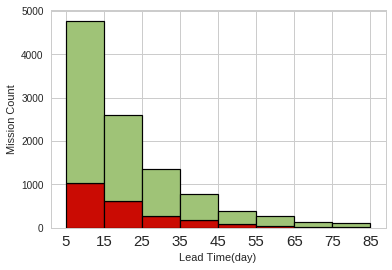

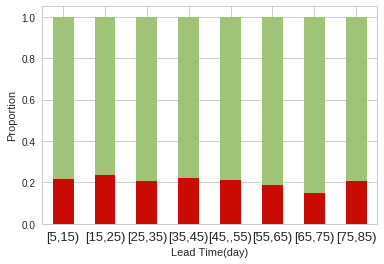

In [0]:
plt.hist(x = [df_leadtime[df_leadtime['cancelled']==0]['lead_time'], 
              df_leadtime[df_leadtime['cancelled']==1]['lead_time']], 
         stacked=True, bins = bins_lt,
         edgecolor='black', linewidth=1.2,
         label = ['Cancelled','Flown'] ,color = ['r','g'])

#plt.title('Lead Time Histogram by Cancellation')
plt.xlabel('Lead Time(day)')
plt.ylabel('Mission Count')
plt.xticks(np.arange(5, 90, step=10),fontsize=15)
#plt.legend()
plt.show()

ind = np.arange(8)
table=pd.crosstab(df_leadtime['LeadTimeBin'],df_leadtime['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                         stacked=True, color = ['r','g'])
plt.xlabel('Lead Time(day)')
plt.ylabel('Proportion')
plt.xticks(ind, ['[5,15)','[15,25)','[25,35)','[35,45)','[45,,55)','[55,65)','[65,75)','[75,85)'],rotation='horizontal',fontsize=13)

ax3.get_legend().remove()
plt.show()



### Mission By Total Weight

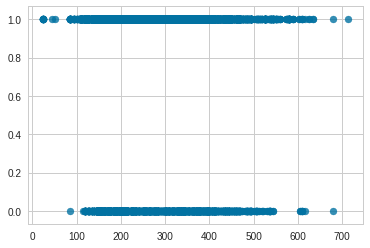

In [0]:
weight_upper = df['total_weight'] <700
df_weight =  df[weight_upper]
plt.scatter(df['total_weight'],df['cancelled'],  alpha=0.8)

In [0]:
bins_w = [0,150,300,450,600,750]
df_weight['WeightBin'] = pd.cut(df_weight['total_weight'].astype(int),bins_w,right = False, include_lowest =True)

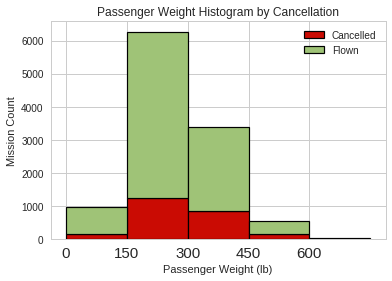

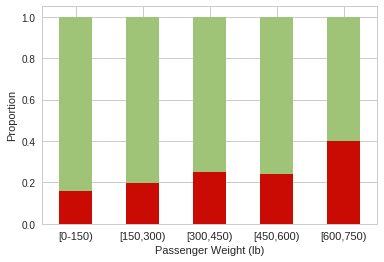

In [0]:
ind = np.arange(6)
plt.hist(x = [df_weight[df_weight['cancelled']==0]['total_weight'], 
              df_weight[df_weight['cancelled']==1]['total_weight']], 
         stacked=True, bins = bins_w,
         edgecolor='black', linewidth=1.2,
         label = ['Cancelled','Flown'] ,color = ['r','g'])
plt.title('Passenger Weight Histogram by Cancellation')
plt.xticks(np.arange(0, 750, step=150),fontsize=15)
plt.xlabel('Passenger Weight (lb)')
plt.ylabel('Mission Count')
plt.legend()

#N_weight =bins_w.nunique()
ind = np.arange(5)
table=pd.crosstab(df_weight['WeightBin'],df_weight['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                         stacked=True, color = ['r','g'])
plt.xlabel('Passenger Weight (lb)')
plt.ylabel('Proportion')
plt.xticks(ind, ['[0-150)','[150,300)','[300,450)','[450,600)','[600,750)'],rotation='horizontal',fontsize=11)
ax3.get_legend().remove()
plt.show()

### Mission By Leg distance

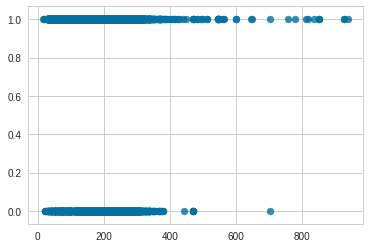

In [0]:
df_distance = df[df['leg_distance'] < 1000]
#df_distance =  df_distance[df_distance['total_distance'] < 1000]
plt.scatter(df_distance['leg_distance'],df_distance['cancelled'],  alpha=0.8)

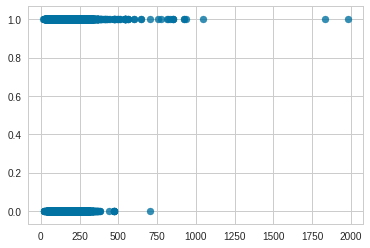

In [0]:
plt.scatter(df['leg_distance'],df['cancelled'],  alpha=0.8)

In [0]:
bins_d = [0,100,200,300,400,500,600,700,800,900,1000]
df_distance['DistanceBin'] = pd.cut(df_distance['leg_distance'], bins_d,right = False, include_lowest =True)

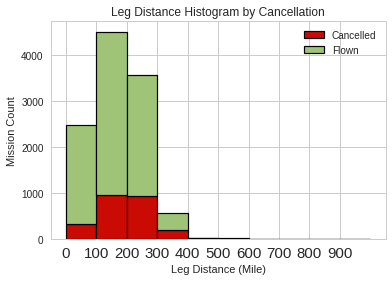

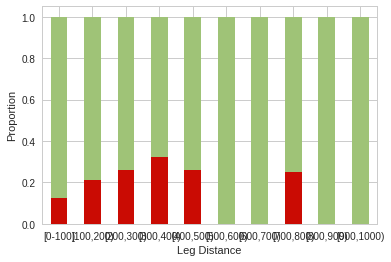

In [0]:
plt.hist(x = [df_distance[df_distance['cancelled']==0]['leg_distance'], 
              df_distance[df_distance['cancelled']==1]['leg_distance']], 
         stacked=True,
         edgecolor='black', linewidth=1.2,
         bins = bins_d, label = ['Cancelled','Flown'] ,color = ['r','g'])
plt.title('Leg Distance Histogram by Cancellation')
plt.xticks(np.arange(0, 1000, step=100),fontsize=15)
plt.xlabel('Leg Distance (Mile)')
plt.ylabel('Mission Count')
plt.legend()

#N_weight =bins_w.nunique()
ind = np.arange(10)
table=pd.crosstab(df_distance['DistanceBin'],df_distance['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                         stacked=True, 
                                                         color = ['r','g'])
plt.xlabel('Leg Distance')
plt.ylabel('Proportion')
plt.xticks(ind, ['[0-100)','[100,200)','[200,300)','[300,400)','[400,500)','[500,600)','[600,700)','[700,800)','[800,900)','[900,1000)'],rotation='horizontal')
ax3.get_legend().remove()
plt.show()

### Mission By Total Distance

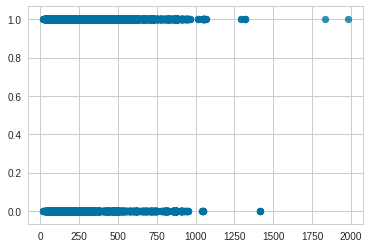

In [0]:
plt.scatter(df['total_distance'],df['cancelled'],  alpha=0.8)

In [0]:
bins_d = (np.arange(0, 1000, step=50))
#(np.arange(0, 1000, step=200))
df_distance['TotalDistanceBin'] = pd.cut(df_distance['total_distance'], bins_d,right = False, include_lowest =True)

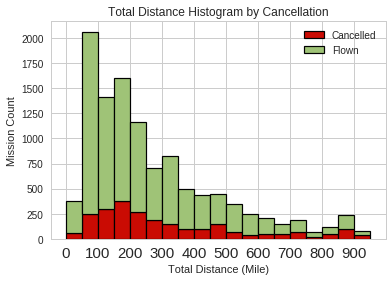

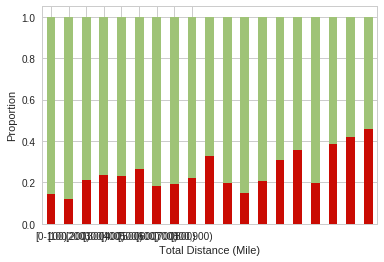

In [0]:
plt.hist(x = [df_distance[df_distance['cancelled']==0]['total_distance'], 
              df_distance[df_distance['cancelled']==1]['total_distance']], 
         stacked=True,
         edgecolor='black', linewidth=1.2,
         bins = bins_d, label = ['Cancelled','Flown'] ,color = ['r','g'])
plt.title('Total Distance Histogram by Cancellation')
plt.xticks(np.arange(0, 1000, step=100),fontsize = 15)
plt.xlabel('Total Distance (Mile)')
plt.ylabel('Mission Count')
plt.legend()

#N_weight =bins_w.nunique()
ind = np.arange(9)
table=pd.crosstab(df_distance['TotalDistanceBin'],df_distance['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                         stacked=True, 
                                                         color = ['r','g'])
plt.xlabel('Total Distance (Mile)')
plt.ylabel('Proportion')
plt.xticks(ind, ['[0-100)','[100,200)','[200,300)','[300,400)','[400,500)','[500,600)','[600,700)','[700,800)','[800,900)'],rotation='horizontal')
ax3.get_legend().remove()
plt.show()

### Mission By Leg Number

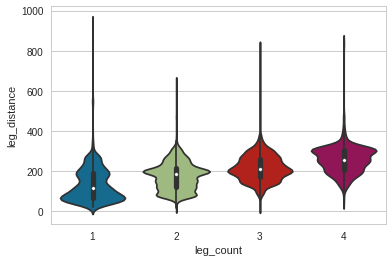

In [0]:
sns.violinplot(df_distance['leg_count'],df_distance['leg_distance'],  alpha=0.8)

([<matplotlib.axis.XTick at 0x7ff5f3c67828>,
 <a list of 10 Text xticklabel objects>)

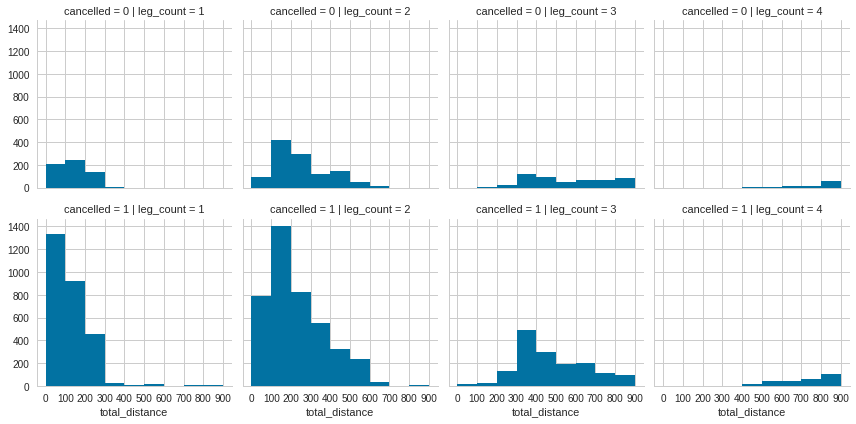

In [0]:
bins_d = (np.arange(0, 1000, step=100))
g = sns.FacetGrid(df_distance, col="leg_count",  row="cancelled")
g = g.map(plt.hist, "total_distance",bins = bins_d)
plt.xticks(np.arange(0, 1000, step=100))

([<matplotlib.axis.XTick at 0x7ff5f38864e0>,
 <a list of 10 Text xticklabel objects>)

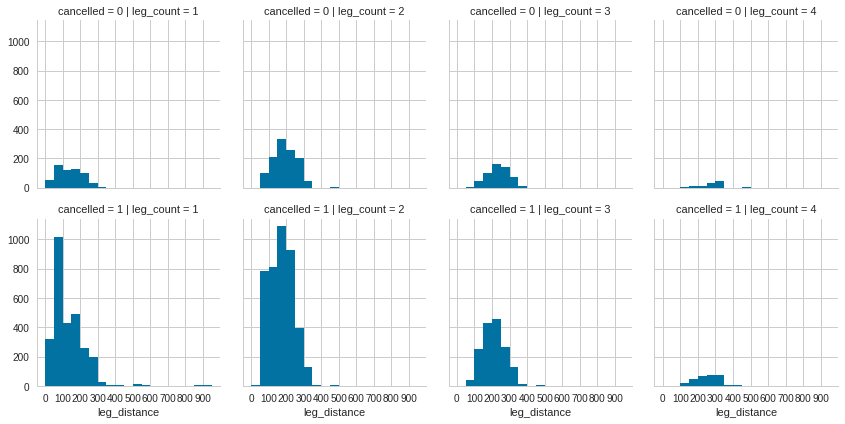

In [0]:
bins_d = (np.arange(0, 1000, step=50))
g = sns.FacetGrid(df_distance, col="leg_count",  row="cancelled")
g = g.map(plt.hist, "leg_distance",bins = bins_d)
plt.xticks(np.arange(0, 1000, step=100))

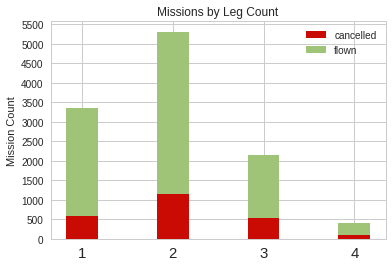

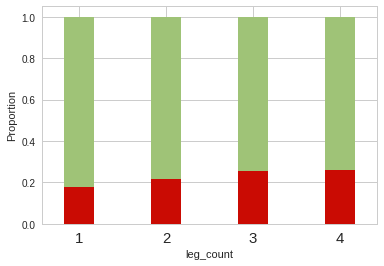

In [0]:
N_leg = df['leg_count'].nunique()

cancelled_leg = (sum(df[df['cancelled']==0]['leg_count']==1), 
             sum(df[df['cancelled']==0]['leg_count']==2),
             sum(df[df['cancelled']==0]['leg_count']==3), 
             sum(df[df['cancelled']==0]['leg_count']==4))
flown_leg = (sum(df[df['cancelled']==1]['leg_count']==1), 
             sum(df[df['cancelled']==1]['leg_count']==2), 
             sum(df[df['cancelled']==1]['leg_count']==3),
             sum(df[df['cancelled']==1]['leg_count']==4))

ind = np.arange(N_leg)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,cancelled_leg, width,color = ['r'])
p2 = plt.bar(ind, flown_leg, width, bottom=cancelled_leg, color = ['g'])

plt.ylabel('Mission Count')
plt.title('Missions by Leg Count')
plt.xticks(ind, ['1','2','3','4'],rotation = 'horizontal',fontsize = 15)
plt.yticks(np.arange(0, 6000,500))
plt.legend((p1[0],p2[0]),('cancelled','flown'))


table=pd.crosstab(df['leg_count'],df['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                                                         width = width,color = ['r','g'])
plt.xlabel('leg_count')
plt.ylabel('Proportion')
plt.xticks(ind, ['1','2','3','4'],rotation = 'horizontal',fontsize = 15)
ax3.get_legend().remove()
plt.show()


##### Observation
* Distance (mission leg): 
  * Most mission leg are within 200 miles.
  * The longer the distance, the higher the cancelled rate.
*  Weight:
  * Passenger weight of most missions is between 100-400 lb. 
  * The cancelled rate grow as the passenger weight increases. While the 
    * Possible reason: many patients haven't filled out the weight of companion and lead to cancellation.
* Lead time(removing records < 5 and >90 days):
 * As the lead time increases, the cancellation rate decreases.

### Mission By Day of Week

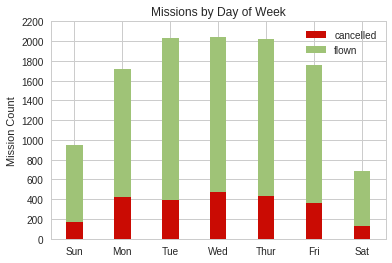

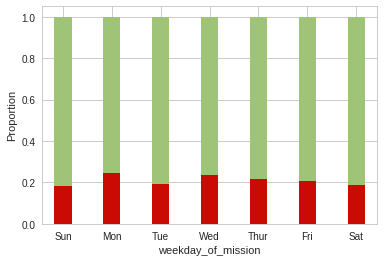

In [0]:
N_weekday = df['weekday_of_mission'].nunique()

cancelled_day= (sum(df[df['cancelled']==0]['weekday_of_mission']==1), 
             sum(df[df['cancelled']==0]['weekday_of_mission']==2),
             sum(df[df['cancelled']==0]['weekday_of_mission']==3), 
             sum(df[df['cancelled']==0]['weekday_of_mission']==4),
            sum(df[df['cancelled']==0]['weekday_of_mission']==5),
            sum(df[df['cancelled']==0]['weekday_of_mission']==6),
            sum(df[df['cancelled']==0]['weekday_of_mission']==7))
flown_day = (sum(df[df['cancelled']==1]['weekday_of_mission']==1), 
             sum(df[df['cancelled']==1]['weekday_of_mission']==2), 
             sum(df[df['cancelled']==1]['weekday_of_mission']==3),
             sum(df[df['cancelled']==1]['weekday_of_mission']==4), 
             sum(df[df['cancelled']==1]['weekday_of_mission']==5),
            sum(df[df['cancelled']==1]['weekday_of_mission']==6),
            sum(df[df['cancelled']==1]['weekday_of_mission']==7))

ind = np.arange(N_weekday)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind,cancelled_day, width,color = ['r'])
p2 = plt.bar(ind, flown_day, width,bottom=cancelled_day,color =['g'])

plt.ylabel('Mission Count')
plt.title('Missions by Day of Week')
plt.xticks(ind, ['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],rotation='horizontal')
plt.yticks(np.arange(0, 2400,200))
plt.legend((p1[0],p2[0]),('cancelled','flown'))



table=pd.crosstab(df['weekday_of_mission'],df['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', width = width, 
                                                         stacked=True, color = ['r','g'])
plt.xlabel('weekday_of_mission')
plt.ylabel('Proportion')
plt.xticks(ind, ['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],rotation='horizontal')
ax3.get_legend().remove()
plt.show()



### Mission By Month

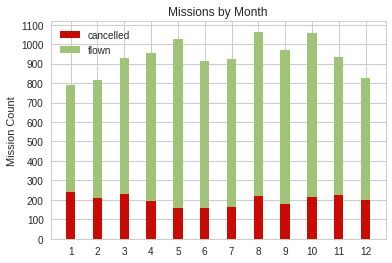

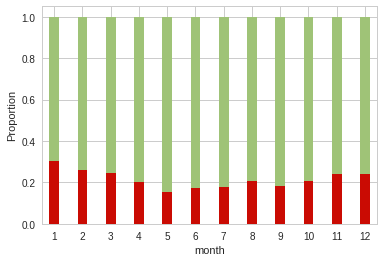

In [0]:

N_month = df['month'].nunique()

ind = np.arange(N_month)    # the x locations for the groups
width = 0.35  

cancelled_month = (sum(df[df['cancelled']==0]['month']==1), 
             sum(df[df['cancelled']==0]['month']==2),
             sum(df[df['cancelled']==0]['month']==3), 
             sum(df[df['cancelled']==0]['month']==4),
            sum(df[df['cancelled']==0]['month']==5),
            sum(df[df['cancelled']==0]['month']==6),
            sum(df[df['cancelled']==0]['month']==7),
             sum(df[df['cancelled']==0]['month']==8), 
             sum(df[df['cancelled']==0]['month']==9),
            sum(df[df['cancelled']==0]['month']==10),
            sum(df[df['cancelled']==0]['month']==11),
            sum(df[df['cancelled']==0]['month']==12))
flown_month = (sum(df[df['cancelled']==1]['month']==1), 
             sum(df[df['cancelled']==1]['month']==2), 
             sum(df[df['cancelled']==1]['month']==3),
             sum(df[df['cancelled']==1]['month']==4), 
             sum(df[df['cancelled']==1]['month']==5),
            sum(df[df['cancelled']==1]['month']==6),
            sum(df[df['cancelled']==1]['month']==7),
            sum(df[df['cancelled']==1]['month']==8),
             sum(df[df['cancelled']==1]['month']==9), 
             sum(df[df['cancelled']==1]['month']==10),
            sum(df[df['cancelled']==1]['month']==11),
            sum(df[df['cancelled']==1]['month']==12))


p1 = plt.bar(ind,cancelled_month, width,color = ['r'])
p2 = plt.bar(ind, flown_month, width,
             bottom=cancelled_month,color = ['g'])

plt.ylabel('Mission Count')
plt.title('Missions by Month')
plt.xticks(ind, ['1','2','3','4','5','6','7','8','9','10','11','12'],rotation = 'horizontal')
plt.yticks(np.arange(0, 1200,100))
plt.legend((p1[0],p2[0]),('cancelled','flown'))





N = df['month'].nunique()
ind = np.arange(N)
table=pd.crosstab(df['month'],df['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                        width = width,color = ['r','g'])
plt.xlabel('month')
plt.ylabel('Proportion')
plt.xticks(ind, ['1','2','3','4','5','6','7','8','9','10','11','12'],rotation = 'horizontal')
ax3.get_legend().remove()
plt.show()


####  Observation:
* Mission Count
 * Peak month of missions : 5,8,10.
 * Month with least missions: 1,2,12
 * 6,7 doesn't have too many missions: camp season?
* Cancellation rate
 * HIghest month: 1,2,3
 * lowest month: 5,6,7

### Mission By Season

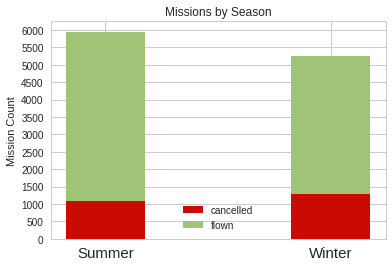

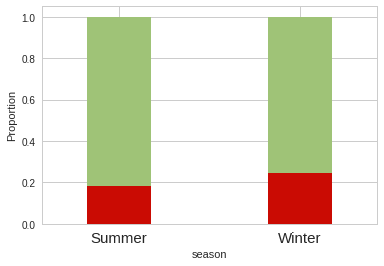

In [0]:
N_season = df['season'].nunique()

cancelled_season = (sum(df[df['cancelled']==0]['season']==0), 
             sum(df[df['cancelled']==0]['season']==1))
flown_season = (sum(df[df['cancelled']==1]['season']==0), 
             sum(df[df['cancelled']==1]['season']==1))

ind = np.arange(N_season)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,cancelled_season, width,color = ['r'])
p2 = plt.bar(ind, flown_season, width,
             bottom=cancelled_season,color = ['g'])

plt.ylabel('Mission Count')
plt.title('Missions by Season')
plt.xticks( ind, ['Summer','Winter'],rotation = 'horizontal',fontsize = 15)
plt.yticks(np.arange(0, 6500,500))
plt.legend((p1[0],p2[0]),('cancelled','flown'),loc = 0)


table=pd.crosstab(df['season'],df['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',width = width,
                                                         stacked=True,color = ['r','g'])
plt.xlabel('season')
plt.ylabel('Proportion')
plt.xticks(ind, ['Summer','Winter'],rotation = 'horizontal',fontsize = 15)
ax3.legend((table[0],table[1]),('cancelled','flown'),loc = 0)
#ax3.get_legend()
plt.show()


### Mission By Passenger Type

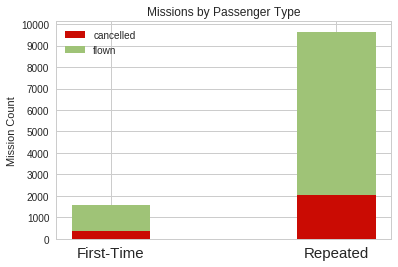

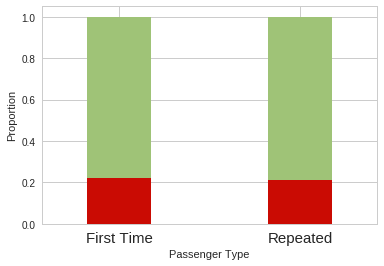

In [0]:
N = df['repeated_passenger'].nunique()
ind = np.arange(N) 




   # the x locations for the groups
width = 0.35  

cancelled_fp = (sum(df[df['cancelled']==0]['repeated_passenger']==0), 
             sum(df[df['cancelled']==0]['repeated_passenger']==1) )
flown_fp = (sum(df[df['cancelled']==1]['repeated_passenger']==0), 
             sum(df[df['cancelled']==1]['repeated_passenger']==1))


p1 = plt.bar(ind,cancelled_fp, width, color = ['r'])
p2 = plt.bar(ind, flown_fp, width,
             bottom=cancelled_fp, color = ['g'])

plt.ylabel('Mission Count')
plt.title('Missions by Passenger Type')
plt.xticks(ind, ['First-Time','Repeated'],rotation = 'horizontal',fontsize = 15)
plt.yticks(np.arange(0, 11000,1000))
plt.legend((p1[0],p2[0]),('cancelled','flown'))



table=pd.crosstab(df['repeated_passenger'],df['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                        width = width, color = ['r','g'])
plt.xlabel('Passenger Type')
plt.ylabel('Proportion')
plt.xticks(ind,['First Time','Repeated'],rotation = 'horizontal',fontsize = 15)
ax3.get_legend().remove()


#### Observation:
* Not much difference in cancellation rate between first time/ repeated passenger

### Mission By Passenger Number

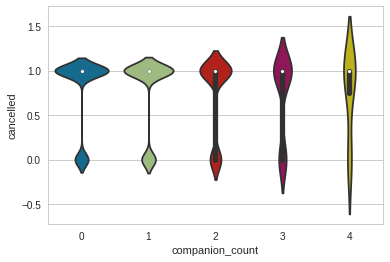

In [0]:
df['companion_count'].unique()
sns.violinplot(df['companion_count'],df['cancelled'],  alpha=0.8)

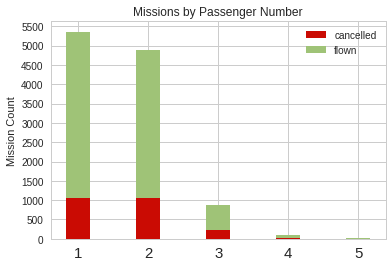

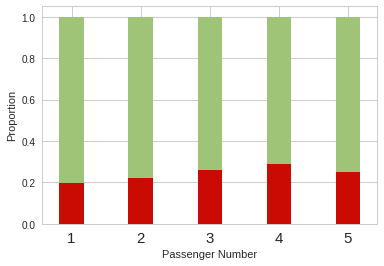

In [0]:
N = df['companion_count'].nunique()
ind = np.arange(N) 



   # the x locations for the groups
width = 0.35  

cancelled_cc = (sum(df[df['cancelled']==0]['companion_count']==0), 
             sum(df[df['cancelled']==0]['companion_count']==1),
               sum(df[df['cancelled']==0]['companion_count']==2),
               sum(df[df['cancelled']==0]['companion_count']==3),
               sum(df[df['cancelled']==0]['companion_count']==4))
flown_cc = (sum(df[df['cancelled']==1]['companion_count']==0), 
             sum(df[df['cancelled']==1]['companion_count']==1),
           sum(df[df['cancelled']==1]['companion_count']==2),
           sum(df[df['cancelled']==1]['companion_count']==3),
           sum(df[df['cancelled']==1]['companion_count']==4))


p1 = plt.bar(ind,cancelled_cc, width, color = ['r'])
p2 = plt.bar(ind, flown_cc, width,
             bottom=cancelled_cc, color = ['g'])

plt.ylabel('Mission Count')
plt.title('Missions by Passenger Number')               
plt.xticks(ind, ['1','2','3','4','5'],rotation = 'horizontal',fontsize = 15)
plt.yticks(np.arange(0, 6000,500))
plt.legend((p1[0],p2[0]),('cancelled','flown'))



table=pd.crosstab(df['companion_count'],df['cancelled'])
ax3 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                        width = width, color = ['r','g'])
plt.xlabel('Passenger Number')
plt.ylabel('Proportion')
plt.xticks(ind,['1','2','3','4','5'],rotation = 'horizontal',fontsize = 15)
ax3.get_legend().remove()


Text(0.5, 1.03, 'Correlations Among Features')

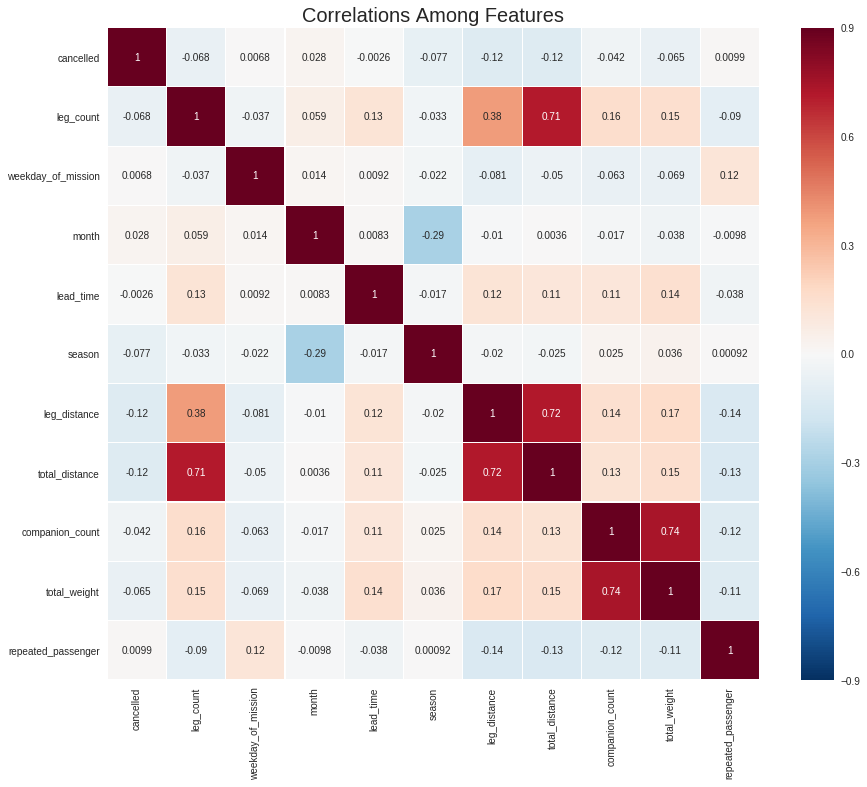

In [0]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)

### Map

In [0]:
df_flight_paths = pd.read_csv('drive/My Drive/Colab Notebooks/assignment/project/flight_path.csv')

FileNotFoundError: ignored

In [0]:
df_airports = pd.read_csv('drive/My Drive/Colab Notebooks/assignment/project/airport.csv')

In [0]:

df_flight_paths_cancelled = df_flight_paths[df_flight_paths['cancelled']==0]


In [0]:
df_flight_paths_cancelled = df_flight_paths_cancelled.reset_index(drop=True)

In [0]:
import plotly.plotly as py

In [0]:
df_airports.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['longitude'],
        lat = df_airports['latitude'],
        hoverinfo = 'text',
        text = df_airports['name'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(70, 130, 180)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            ),opacity = 0.3
        ))]
        
flight_paths_cancelled = []
for i in range( len( df_flight_paths_cancelled ) ):
    flight_paths_cancelled.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths_cancelled['f_long'][i], df_flight_paths_cancelled['t_long'][i]],
            lat = [ df_flight_paths_cancelled['f_lat'][i], df_flight_paths_cancelled['t_lat'][i] ],
            hoverinfo = 'text',
            text = [df_flight_paths_cancelled['f_name'][i],df_flight_paths_cancelled['t_name'][i]],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths_cancelled['count(*)'][i])/float(df_flight_paths_cancelled['count(*)'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths_cancelled + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )

In [0]:
 df1 = df_flight_paths_cancelled.loc[:,['f_name','t_name','count(*)']]
df1.sort_values(by=['count(*)'],ascending=False)

In [0]:
for index, line in df_flight_paths_cancelled.iterrows():
  

In [0]:
df_flight_paths_cancelled.head()

## 3. Modeling

### Create bins

In [0]:
lead_time_lower = df['lead_time']>=5
lead_time_upper = df['lead_time']<90
df = df[lead_time_lower & lead_time_upper]

leg_distance_upper = df['leg_distance'] < 590
total_distance_upper = df['total_distance'] < 1000
df = df[leg_distance_upper]
df =  df[total_distance_upper ]

weight_upper = df['total_weight'] <700
df =  df[weight_upper]

companion_count_upper = df['companion_count'] <4

df = df[companion_count_upper]

In [0]:
X = df.drop(['cancelled','month'], axis = 1)
y = df['cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42, stratify=y)

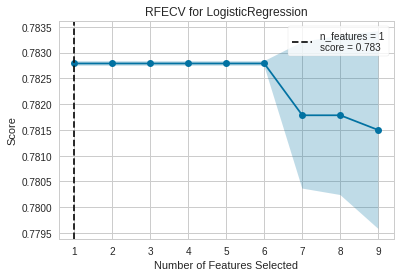

In [0]:
logreg = LogisticRegression()
viz = RFECV(logreg, cv=3, scoring='accuracy')
viz.fit(X_train, y_train)
viz.poof()

In [0]:
logit_model=smf.Logit(y_train, X_train)
result=logit_model.fit() 
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.520798
         Iterations 5
                          Results: Logit
Model:                Logit            No. Iterations:   5.0000   
Dependent Variable:   cancelled        Pseudo R-squared: 0.005    
Date:                 2019-04-04 05:03 AIC:              7268.5450
No. Observations:     6961             BIC:              7330.1777
Df Model:             8                Log-Likelihood:   -3625.3  
Df Residuals:         6952             LL-Null:          -3643.1  
Converged:            1.0000           Scale:            1.0000   
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
leg_count           0.4287   0.0495  8.6624 0.0000  0.3317  0.5257
weekday_of_mission  0.0716   0.0158  4.5287 0.0000  0.0406  0.1026
lead_time           0.0110   0.0020  5.4380 0.0000  0

In [0]:
df_bins = df.copy()

#### passenger_weight bin

In [0]:
bins_w = [0,200,300,400,500,700]
df_bins['WeightBin'] = pd.cut(df_bins['total_weight'].astype(int),bins_w,right = False, include_lowest =True)

In [0]:
df_bins = pd.get_dummies(df_bins,columns=['WeightBin'])
df_bins = df_bins.drop(['total_weight'],axis=1)

In [0]:
df_bins.columns

Index(['cancelled', 'leg_count', 'weekday_of_mission', 'month', 'lead_time',
       'season', 'leg_distance', 'total_distance', 'companion_count',
       'repeated_passenger', 'WeightBin_[0, 200)', 'WeightBin_[200, 300)',
       'WeightBin_[300, 400)', 'WeightBin_[400, 500)', 'WeightBin_[500, 700)'],
      dtype='object')

In [0]:
X = df_bins.drop(['cancelled','month','weekday_of_mission','companion_count','repeated_passenger'], axis = 1)
y = df_bins['cancelled']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42, stratify=y)

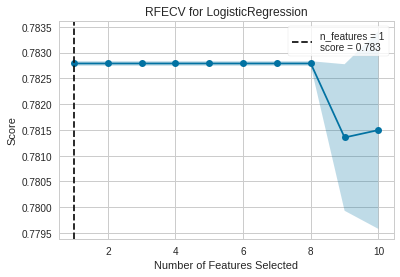

In [0]:
logreg = LogisticRegression()
viz = RFECV(logreg, cv=3, scoring='accuracy')
viz.fit(X_train, y_train)
viz.poof()

In [0]:
logit_model=smf.Logit(y_train, X_train)
result=logit_model.fit() 
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.505577
         Iterations 6
                           Results: Logit
Model:                Logit             No. Iterations:    6.0000   
Dependent Variable:   cancelled         Pseudo R-squared:  0.034    
Date:                 2019-04-04 05:05  AIC:               7058.6394
No. Observations:     6961              BIC:               7127.1202
Df Model:             9                 Log-Likelihood:    -3519.3  
Df Residuals:         6951              LL-Null:           -3643.1  
Converged:            1.0000            Scale:             1.0000   
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
leg_count             0.0762   0.0561  1.3567 0.1749 -0.0339  0.1862
lead_time             0.0082   0.0020  4.1195 0.0000  0.0043  0.0122
season               -0.4322

#### lead_time bin

In [0]:
bins_lt = (np.arange(5, 90, step=10))
df_bins['LeadTimeBin'] = pd.cut(df_bins['lead_time'].astype(int), bins_lt,right = False, include_lowest =True)

In [0]:
df_bins = pd.get_dummies(df_bins,columns=['LeadTimeBin'])
df_bins = df_bins.drop(['lead_time'],axis=1)

In [0]:
X = df_bins.drop(['cancelled','month'], axis = 1)
y = df_bins['cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42, stratify=y)

In [0]:
X.head()

,leg_count,weekday_of_mission,season,leg_distance,total_distance,companion_count,repeated_passenger,"WeightBin_[0, 200)","WeightBin_[200, 300)","WeightBin_[300, 400)","WeightBin_[400, 500)","WeightBin_[500, 700)","LeadTimeBin_[5, 15)","LeadTimeBin_[15, 25)","LeadTimeBin_[25, 35)","LeadTimeBin_[35, 45)","LeadTimeBin_[45, 55)","LeadTimeBin_[55, 65)","LeadTimeBin_[65, 75)","LeadTimeBin_[75, 85)"
0,2,4,1,201,201,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,4,1,201,201,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,1,162,340,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5,2,2,1,178,340,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
6,2,4,1,164,368,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
logit_model=smf.Logit(y_train, X_train)
result=logit_model.fit() 
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.505223
         Iterations 6
                           Results: Logit
Model:                Logit             No. Iterations:    6.0000   
Dependent Variable:   cancelled         Pseudo R-squared:  0.035    
Date:                 2019-04-04 05:05  AIC:               7073.7176
No. Observations:     6961              BIC:               7210.6791
Df Model:             19                Log-Likelihood:    -3516.9  
Df Residuals:         6941              LL-Null:           -3643.1  
Converged:            1.0000            Scale:             1.0000   
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
leg_count             0.0758   0.0565  1.3410 0.1799 -0.0350  0.1865
weekday_of_mission   -0.0227   0.0175 -1.2968 0.1947 -0.0571  0.0116
season               -0.4352

#### leg distance bin

In [0]:
bins_d = [0,250,500,750]
df_bins['DistanceBin'] = pd.cut(df_bins['leg_distance'], bins_d,right = False, include_lowest =True)

In [0]:
df_bins = pd.get_dummies(df_bins,columns=['DistanceBin'])
df_bins = df_bins.drop(['leg_distance'],axis=1)

In [0]:
X = df_bins.drop(['cancelled','month'], axis = 1)
y = df_bins['cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [0]:
X.head()

,leg_count,weekday_of_mission,season,total_distance,companion_count,repeated_passenger,"WeightBin_[0, 200)","WeightBin_[200, 300)","WeightBin_[300, 400)","WeightBin_[400, 500)",...,"LeadTimeBin_[15, 25)","LeadTimeBin_[25, 35)","LeadTimeBin_[35, 45)","LeadTimeBin_[45, 55)","LeadTimeBin_[55, 65)","LeadTimeBin_[65, 75)","LeadTimeBin_[75, 85)","DistanceBin_[0, 250)","DistanceBin_[250, 500)","DistanceBin_[500, 750)"
0,2,4,1,201,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,4,1,201,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,2,1,340,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,2,2,1,340,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,2,4,1,368,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
logit_model=smf.Logit(y_train, X_train)
result=logit_model.fit() 
print(result.summary2())

         Current function value: 0.508184
         Iterations: 35
                            Results: Logit
Model:                Logit              No. Iterations:     35.0000  
Dependent Variable:   cancelled          Pseudo R-squared:   0.029    
Date:                 2019-04-04 05:06   AIC:                8490.0557
No. Observations:     8312               BIC:                8637.5903
Df Model:             20                 Log-Likelihood:     -4224.0  
Df Residuals:         8291               LL-Null:            -4350.8  
Converged:            0.0000             Scale:              1.0000   
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
leg_count               0.1535   0.0515  2.9823 0.0029  0.0526  0.2543
weekday_of_mission     -0.0120   0.0160 -0.7537 0.4510 -0.0434  0.0193
season                 -0.4145   0.0544

#### total distance bin

In [0]:
bins_d = (np.arange(0, 1000, step=200))
df_bins['TotalDistanceBin'] = pd.cut(df_bins['total_distance'], bins_d,right = False, include_lowest =True)

In [0]:
df_bins = pd.get_dummies(df_bins,columns=['TotalDistanceBin'])
df_bins = df_bins.drop(['total_distance'],axis=1)

In [0]:
X = df_bins.drop(['cancelled','month','repeated_passenger','weekday_of_mission','companion_count'], axis = 1)
y = df_bins['cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [0]:
X.columns

Index(['leg_count', 'season', 'WeightBin_[0, 200)', 'WeightBin_[200, 300)',
       'WeightBin_[300, 400)', 'WeightBin_[400, 500)', 'WeightBin_[500, 700)',
       'LeadTimeBin_[5, 15)', 'LeadTimeBin_[15, 25)', 'LeadTimeBin_[25, 35)',
       'LeadTimeBin_[35, 45)', 'LeadTimeBin_[45, 55)', 'LeadTimeBin_[55, 65)',
       'LeadTimeBin_[65, 75)', 'LeadTimeBin_[75, 85)', 'DistanceBin_[0, 250)',
       'DistanceBin_[250, 500)', 'DistanceBin_[500, 750)',
       'TotalDistanceBin_[0, 200)', 'TotalDistanceBin_[200, 400)',
       'TotalDistanceBin_[400, 600)', 'TotalDistanceBin_[600, 800)'],
      dtype='object')

In [0]:
logit_model=smf.Logit(y_train, X_train)
result=logit_model.fit() 
print(result.summary2())

         Current function value: 0.507244
         Iterations: 35
                              Results: Logit
Model:                   Logit               No. Iterations:      35.0000  
Dependent Variable:      cancelled           Pseudo R-squared:    0.031    
Date:                    2019-04-04 05:06    AIC:                 7420.3726
No. Observations:        7273                BIC:                 7565.1030
Df Model:                20                  Log-Likelihood:      -3689.2  
Df Residuals:            7252                LL-Null:             -3806.7  
Converged:               0.0000              Scale:               1.0000   
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
leg_count                    0.0962   0.0521  1.8480 0.0646 -0.0058  0.1983
season                      -0.4217   0.0583 -7.2354 

In [0]:
df.columns

Index(['cancelled', 'leg_count', 'weekday_of_mission', 'month', 'lead_time',
       'season', 'leg_distance', 'total_distance', 'companion_count',
       'total_weight', 'repeated_passenger'],
      dtype='object')

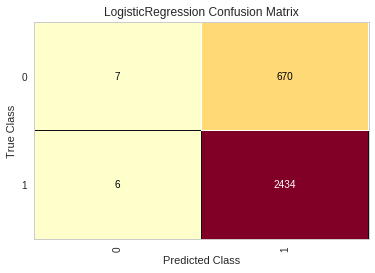

In [0]:

from yellowbrick.classifier import ConfusionMatrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
# logreg_accy_train = round(logreg.score(X_train, y_train),2)
# logreg_accy = round(logreg.score(X_test, y_test),2)
logreg_accy_train = logreg.score(X_train, y_train)
logreg_accy = logreg.score(X_test, y_test)


cm = ConfusionMatrix(logreg, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [0]:
print('Accuracy of logistic regression classifier on training set: {}'.format(logreg_accy_train))
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg_accy))

Accuracy of logistic regression classifier on training set: 0.7823456620376736
Accuracy of logistic regression classifier on test set: 0.7831247994866859


In [0]:
!pip install torch


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as torch_data
t_xtr = torch.from_numpy(np.array(X_train)).float()
t_ytr = torch.from_numpy(np.array(y_train))
t_xte = torch.from_numpy(np.array(X_test)).float()
t_yte = torch.from_numpy(np.array(y_test))

dataset = torch_data.TensorDataset(t_xtr, t_ytr)
data_loader = torch_data.DataLoader(dataset, batch_size=128, shuffle=True)

In [0]:
d_in = t_xtr.shape[1]
print('Input dim: {}'.format(d_in))
model = nn.Sequential(
    nn.Linear(d_in, 40),
    nn.ReLU(),
    nn.Linear(40, 40),
    nn.ReLU(),
    nn.Linear(40, 20),
    nn.ReLU(),
    nn.Linear(20, 1),
)
optimizer = optim.Adam(model.parameters(), lr=0.001)
step = 0
ep = 0
for ep in range(100):
  ep += 1
  for batch_x, batch_y in data_loader:
    step += 1
    logits = model(batch_x)
    loss = F.binary_cross_entropy_with_logits(logits.view(-1), target=batch_y.float())
    model.zero_grad()
    loss.backward()
    optimizer.step()
  if ep % 5 == 0:
    with torch.no_grad():
      pred = (F.sigmoid(model(t_xtr).view(-1)) >= 0.5).long()
      acc = (pred == t_ytr).float().mean()
    print('ep {:03d} step {:04d} loss {:.5f} acc {:.5f}'.format(ep, step, loss, acc))


pred = (F.sigmoid(model(t_xtr).view(-1)) >= 0.5).long()
acc_tr = (pred == t_ytr).float().mean()
pred = (F.sigmoid(model(t_xte).view(-1)) >= 0.5).long()
acc_te = (pred == t_yte).float().mean()
print('Final train/test accuracy: {} / {}'.format(acc_tr, acc_te))

Input dim: 22
ep 005 step 0570 loss 0.52798 acc 0.78276
ep 010 step 1140 loss 0.52291 acc 0.78276
ep 015 step 1710 loss 0.44871 acc 0.78730
ep 020 step 2280 loss 0.42877 acc 0.79417
ep 025 step 2850 loss 0.53673 acc 0.79500
ep 030 step 3420 loss 0.53224 acc 0.79665
ep 035 step 3990 loss 0.43864 acc 0.79830
ep 040 step 4560 loss 0.29507 acc 0.80036
ep 045 step 5130 loss 0.54735 acc 0.80366
ep 050 step 5700 loss 0.36602 acc 0.80421
ep 055 step 6270 loss 0.47789 acc 0.80407
ep 060 step 6840 loss 0.33026 acc 0.80668
ep 065 step 7410 loss 0.60405 acc 0.80764
ep 070 step 7980 loss 0.49985 acc 0.80352
ep 075 step 8550 loss 0.34619 acc 0.80764
ep 080 step 9120 loss 0.47927 acc 0.80709
ep 085 step 9690 loss 0.56121 acc 0.80888
ep 090 step 10260 loss 0.60520 acc 0.80764
ep 095 step 10830 loss 0.41862 acc 0.80957
ep 100 step 11400 loss 0.33657 acc 0.80957
Final train/test accuracy: 0.8095696568489075 / 0.7802374362945557


In [0]:
t_ytr.float().mean().item()

0.7827581763267517

In [0]:
t_yte.float().mean().item()

0.7828039526939392

In [0]:
df.head(1000)

,cancelled,leg_count,weekday_of_mission,month,lead_time,season,leg_distance,total_distance,companion_count,total_weight,repeated_passenger
0,1,2,4,1,89,1,201,201,0,125,1
1,1,2,4,1,89,1,201,201,0,125,1
4,1,2,2,1,84,1,162,340,0,145,1
5,1,2,2,1,84,1,178,340,0,145,1
6,1,2,4,1,86,1,164,368,0,145,1
7,1,2,4,1,86,1,204,368,0,145,1
10,1,1,6,1,59,1,183,183,1,280,1
11,1,1,6,1,59,1,183,183,1,280,1
14,1,1,5,1,63,1,148,148,3,462,1
15,1,1,6,1,64,1,148,148,3,462,1
